In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt


%matplotlib inline

In [2]:
import requests 
url = '#####'

headers = {'accept': 'application/json', 'content-type': 'application/json'}
jsonobj = {'appId': ####, 'password': '####'}
resp = requests.post(url=url, headers=headers, json=jsonobj)
data = resp.json()
token = data.get("access_token")

In [3]:
url3 = '#####'


headers['Authorization'] = f"Bearer {token}"

resp = requests.get(url=url3, headers=headers)
data = resp.json()


In [4]:
df_com = pd.json_normalize(data)
df_com = df_com[['logDayFrom','user.firstName', 'user.lastName', 'comment']]


In [5]:
df3 =df_com[(df_com['logDayFrom'] >= '2020-11-01') & (df_com['logDayFrom'] < '2020-12-01')]
df3

,logDayFrom,user.firstName,user.lastName,comment
3416,2020-11-02 09:00:00,Krzysztof,Blysz,
3417,2020-11-04 09:00:00,Krzysztof,Blysz,
3418,2020-11-05 09:00:00,Krzysztof,Blysz,
3419,2020-11-06 09:00:00,Krzysztof,Blysz,
3420,2020-11-09 09:00:00,Krzysztof,Blysz,
...,...,...,...,...
6707,2020-11-24 08:00:00,Lukasz,Szklarski,
6708,2020-11-25 08:00:00,Lukasz,Szklarski,
6709,2020-11-26 08:00:00,Lukasz,Szklarski,
6710,2020-11-27 08:00:00,Lukasz,Szklarski,


In [6]:
from textblob import TextBlob

for t in df3['comment']:
    testimonial = TextBlob(t)
   

In [7]:
df3["subjectivity"] = df3.apply(lambda x: TextBlob(x['comment']).sentiment.subjectivity, axis = 1)


C:\Users\macgu\AppData\Local\Temp\ipykernel_22468\73278862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["subjectivity"] = df3.apply(lambda x: TextBlob(x['comment']).sentiment.subjectivity, axis = 1)


In [8]:
df_com = df_com[df_com.comment != '']

In [9]:
url3 = '####'


headers['Authorization'] = f"Bearer {token}"
args = {'userids': ['userid'], 'param2': 'value'}
resp = requests.get(url=url3, headers=headers, params=args)
data = resp.json()
dict_list = []
for obj in data:
    if obj["comment"] is not None and len(obj['comment']) > 0:
        dict1 = {"userId": obj["userId"], "logDayFrom": obj["logDayFrom"], "logDayTo": obj["logDayTo"], "comment": obj["comment"]}
        dict_list.append(dict1)

df_com = pd.DataFrame(dict_list)



In [10]:
url3 = '######'


headers['Authorization'] = f"Bearer {token}"
args = {'userids': ['userid'], 'param2': 'value'}
resp = requests.get(url=url3, headers=headers, params=args)
data = resp.json()

In [11]:
df_com.sort_values(by='userId',ascending=True)

,userId,logDayFrom,logDayTo,comment
2116,10,2022-05-12 07:00:00,2022-05-12 15:00:00,test
241,10,2020-10-14 08:00:00,2020-10-14 16:00:00,Reviewing code of Sperry Site. Trying to resol...
1222,10,2020-11-05 08:00:00,2020-11-05 16:00:00,Setup Sperry Site on 172.16.1.98
1234,10,2020-11-06 08:00:00,2020-11-06 16:00:00,finish upgrading sperry site dev server
1278,10,2020-11-10 08:00:00,2020-11-10 16:00:00,Check relation in PS DB. Fix problem with VM
...,...,...,...,...
2003,69,2020-11-30 12:00:00,2020-11-30 18:00:00,"0,5hr DM team meeting; 1hr SF mapping, 4,5 hrs..."
1792,69,2020-11-24 13:00:00,2020-11-24 17:30:00,"0,5hr DM team meeting; 1hr SF mapping, 3 hrs o..."
1488,69,2020-11-03 14:00:00,2020-11-03 17:00:00,"Wrap up calls, data mapping sessions, etc."
2064,69,2020-12-30 12:00:00,2020-12-30 18:00:00,"S4 Mapping preparation incl. Templates, S4 des..."


quering user id

In [12]:
df_com.query('userId == 20', inplace = True)


In [13]:
df_com

,userId,logDayFrom,logDayTo,comment
16,20,2020-08-18 08:30:00,2020-08-18 09:30:00,B+R doc. preparation
184,20,2020-09-01 16:15:00,2020-09-01 18:45:00,EdgeIQ deltathermal preparation and meeting (w...
210,20,2020-10-08 13:00:00,2020-10-08 23:00:00,preparing training set for vendors (dividing c...
211,20,2020-10-05 20:00:00,2020-10-05 23:30:00,"meeting, continuing with the can, checking AWS..."
212,20,2020-10-14 20:00:00,2020-10-14 23:00:00,sent 2kB for the first time with new hardware ...
...,...,...,...,...
2037,20,2020-11-26 10:00:00,2020-11-26 18:00:00,vendor integration - documentation / env insta...
2038,20,2020-11-27 10:00:00,2020-11-27 18:00:00,vendor itegration - trying to connect to sandb...
2039,20,2020-11-30 10:30:00,2020-11-30 18:30:00,"vendor results interpretation, integration pro..."
2040,20,2020-11-16 20:00:00,2020-11-16 21:00:00,"Tried to detect and shoot images on 139, depen..."


In [14]:
df_com.describe()

,userId
count,114.0
mean,20.0
std,0.0
min,20.0
25%,20.0
50%,20.0
75%,20.0
max,20.0


date 

In [15]:
df3 =df_com[(df_com['logDayFrom'] >= '2020-11-01') & (df_com['logDayFrom'] < '2020-12-01')]
df3

,userId,logDayFrom,logDayTo,comment
1190,20,2020-11-24 20:00:00,2020-11-24 22:00:00,implemented and tested reshaping the thermal f...
1191,20,2020-11-25 20:00:00,2020-11-25 22:00:00,preparation for and meeting with Marek regardi...
1192,20,2020-11-09 18:00:00,2020-11-09 23:00:00,"weekly, preparation for weekly, trying to get ..."
1202,20,2020-11-10 12:00:00,2020-11-10 20:00:00,working on analysis of vendors results - new l...
1203,20,2020-11-12 12:00:00,2020-11-12 20:00:00,working on analysis of vendors' results - new ...
...,...,...,...,...
2037,20,2020-11-26 10:00:00,2020-11-26 18:00:00,vendor integration - documentation / env insta...
2038,20,2020-11-27 10:00:00,2020-11-27 18:00:00,vendor itegration - trying to connect to sandb...
2039,20,2020-11-30 10:30:00,2020-11-30 18:30:00,"vendor results interpretation, integration pro..."
2040,20,2020-11-16 20:00:00,2020-11-16 21:00:00,"Tried to detect and shoot images on 139, depen..."


df_com['logDayFrom'] = pd.to_datetime(df_com['logDayFrom'], errors='coerce')
df_com['logDayFrom'] = pd.to_datetime(df_com["logDayFrom"].dt.strftime('%Y-%m'))
df_data20 = df_com[(df_com['logDayFrom'] >= '2020-11-01') & (df_com['logDayFrom'] < '2020-12-01')]


In [16]:
df_com = df3

In [17]:
from textblob import TextBlob

for t in df_com['comment']:
    testimonial = TextBlob(t)
#     print(str(t) + " : " + str(testimonial.sentiment))

In [18]:
df_com["polarity"] = df_com.apply(lambda x: TextBlob(x['comment']).sentiment.polarity, axis = 1)


C:\Users\macgu\AppData\Local\Temp\ipykernel_22468\2521278807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com["polarity"] = df_com.apply(lambda x: TextBlob(x['comment']).sentiment.polarity, axis = 1)


In [19]:
df3["subjectivity"] = df3.apply(lambda x: TextBlob(x['comment']).sentiment.subjectivity, axis = 1)



C:\Users\macgu\AppData\Local\Temp\ipykernel_22468\16039429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["subjectivity"] = df3.apply(lambda x: TextBlob(x['comment']).sentiment.subjectivity, axis = 1)


In [21]:
df3.describe()

,userId,polarity,subjectivity
count,66.0,66.000000,66.000000
mean,20.0,0.034451,0.168343
std,0.0,0.115543,0.257986
min,20.0,-0.200000,0.000000
25%,20.0,0.000000,0.000000
50%,20.0,0.000000,0.000000
75%,20.0,0.068182,0.227273
max,20.0,0.425000,1.000000


In [22]:
import matplotlib.pyplot as plt

In [23]:
df_com.describe()

,userId,polarity,subjectivity
count,66.0,66.000000,66.000000
mean,20.0,0.034451,0.168343
std,0.0,0.115543,0.257986
min,20.0,-0.200000,0.000000
25%,20.0,0.000000,0.000000
50%,20.0,0.000000,0.000000
75%,20.0,0.068182,0.227273
max,20.0,0.425000,1.000000


In [24]:
df_com

,userId,logDayFrom,logDayTo,comment,polarity,subjectivity
1190,20,2020-11-24 20:00:00,2020-11-24 22:00:00,implemented and tested reshaping the thermal f...,0.000000,0.000000
1191,20,2020-11-25 20:00:00,2020-11-25 22:00:00,preparation for and meeting with Marek regardi...,-0.200000,0.100000
1192,20,2020-11-09 18:00:00,2020-11-09 23:00:00,"weekly, preparation for weekly, trying to get ...",0.000000,0.000000
1202,20,2020-11-10 12:00:00,2020-11-10 20:00:00,working on analysis of vendors results - new l...,0.136364,0.454545
1203,20,2020-11-12 12:00:00,2020-11-12 20:00:00,working on analysis of vendors' results - new ...,0.212121,0.318182
...,...,...,...,...,...,...
2037,20,2020-11-26 10:00:00,2020-11-26 18:00:00,vendor integration - documentation / env insta...,0.000000,0.000000
2038,20,2020-11-27 10:00:00,2020-11-27 18:00:00,vendor itegration - trying to connect to sandb...,0.000000,0.000000
2039,20,2020-11-30 10:30:00,2020-11-30 18:30:00,"vendor results interpretation, integration pro...",0.000000,0.000000
2040,20,2020-11-16 20:00:00,2020-11-16 21:00:00,"Tried to detect and shoot images on 139, depen...",-0.166667,0.805556


In [25]:
def sentiment(x):
    if x < 0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

    df_com['polarity'] = df_com['polarity'].map(lambda x: sentiment(x))

 

<BarContainer object of 9 artists>

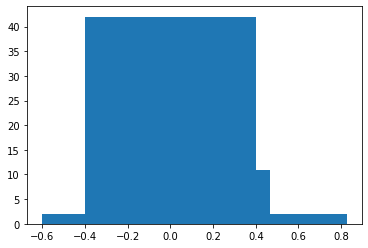

In [26]:
plt.bar(df_com.polarity.value_counts().index, df_com.polarity.value_counts())

In [27]:
df66 = df3

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from vaderSentiment import vaderSentiment

analyzer = SentimentIntensityAnalyzer()

for sentence in df66['comment']:
    vs = analyzer.polarity_scores(sentence)
#     print("{:-<65} {}".format(sentence, str(vs)))

In [35]:
df66["pos"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['pos'], axis = 1)



C:\Users\macgu\AppData\Local\Temp\ipykernel_22468\2661884741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df66["pos"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['pos'], axis = 1)


In [36]:
df66["neu"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['neu'], axis = 1)


C:\Users\macgu\AppData\Local\Temp\ipykernel_22468\1697738829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df66["neu"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['neu'], axis = 1)


In [37]:
df66["neg"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['neg'], axis = 1)


C:\Users\macgu\AppData\Local\Temp\ipykernel_22468\2510958666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df66["neg"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['neg'], axis = 1)


In [38]:
df66["compound"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['compound'], axis = 1)


C:\Users\macgu\AppData\Local\Temp\ipykernel_22468\3346425681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df66["compound"] = df_com.apply(lambda x: analyzer.polarity_scores(x['comment'])['compound'], axis = 1)


In [39]:
df66.describe()

,userId,polarity,subjectivity,pos,neu,neg,compound
count,66.0,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,20.0,0.034451,0.168343,0.047000,0.941167,0.011833,0.088597
std,0.0,0.115543,0.257986,0.099766,0.098244,0.028776,0.267102
min,20.0,-0.200000,0.000000,0.000000,0.499000,0.000000,-0.557400
25%,20.0,0.000000,0.000000,0.000000,0.901250,0.000000,0.000000
50%,20.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,20.0,0.068182,0.227273,0.086000,1.000000,0.000000,0.273200
max,20.0,0.425000,1.000000,0.501000,1.000000,0.153000,0.841500
